In [19]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
import time

In [20]:
data = pd.read_csv('C:/Users/Juan Carlos/Downloads/winequalityN.csv', sep=',', header=0)
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [21]:
print("Dataset:: ")
data['great_wine'] = np.where(data['quality']>=8,1,0)
data = data.drop('quality', axis='columns')

le_type = LabelEncoder()

data = data.dropna()
data['type'] = le_type.fit_transform(data['type'])

Label = preprocessing.LabelEncoder()

X = data.values[: , 0:11]
Y = data.values[: ,12]

X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.3)

Dataset:: 


In [22]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [23]:
start = time.time()
classifier_10 = KNeighborsClassifier(n_neighbors=10, p=2, metric='euclidean')
classifier_10.fit(X_train, Y_train)
end = time.time()

In [24]:
y_pred = classifier_10.predict(X_test)

In [25]:
cm = confusion_matrix(Y_test, y_pred)

print("RunTime for 10 neighbors: ", end-start)
print(accuracy_score(Y_test, y_pred))

RunTime for 10 neighbors:  0.010983705520629883
0.9721505930892212


In [26]:
start = time.time()
classifier_50 = KNeighborsClassifier(n_neighbors=50, p=2, metric='euclidean')
classifier_50.fit(X_train, Y_train)
y_pred = classifier_50.predict(X_test)
end = time.time()

cm = confusion_matrix(Y_test, y_pred)
print("RunTime for 50 neighbors: ", end-start)
print(accuracy_score(Y_test, y_pred))

RunTime for 50 neighbors:  0.19005131721496582
0.9731820526044352


In [27]:
start = time.time()
classifier_100 = KNeighborsClassifier(n_neighbors=100, p=2, metric='euclidean')
classifier_100.fit(X_train, Y_train)
y_pred = classifier_100.predict(X_test)
end = time.time()
cm = confusion_matrix(Y_test, y_pred)
print("RunTime for 100 neighbors: ", end-start)
print(accuracy_score(Y_test, y_pred))

RunTime for 100 neighbors:  0.22399520874023438
0.9731820526044352


In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(16, input_dim=11, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid'))  
model.compile(loss='binary_crossentropy',
              optimizer='adam',             #also try adam
              metrics=['accuracy'])

#model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                192       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
None



Bad key text.latex.preview in file C:\Users\Juan Carlos\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Juan Carlos\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Juan Carlos\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality para


Train on 4524 samples, validate on 1939 samples
Epoch 1/50
4524/4524 [==============================] - 0s 52us/step - loss: 0.7214 - accuracy: 0.5851 - val_loss: 0.5028 - val_accuracy: 0.8247
Epoch 2/50
4524/4524 [==============================] - 0s 17us/step - loss: 0.4004 - accuracy: 0.8736 - val_loss: 0.3005 - val_accuracy: 0.9495
Epoch 3/50
4524/4524 [==============================] - 0s 15us/step - loss: 0.2800 - accuracy: 0.9425 - val_loss: 0.2137 - val_accuracy: 0.9701
Epoch 4/50
4524/4524 [==============================] - 0s 15us/step - loss: 0.2236 - accuracy: 0.9567 - val_loss: 0.1747 - val_accuracy: 0.9727
Epoch 5/50
4524/4524 [==============================] - 0s 16us/step - loss: 0.1963 - accuracy: 0.9629 - val_loss: 0.1552 - val_accuracy: 0.9732
Epoch 6/50
4524/4524 [==============================] - 0s 17us/step - loss: 0.1760 - accuracy: 0.9664 - val_loss: 0.1434 - val_accuracy: 0.9732
Epoch 7/50
4524/4524 [==============================] - 0s 17us/step - loss: 0.17

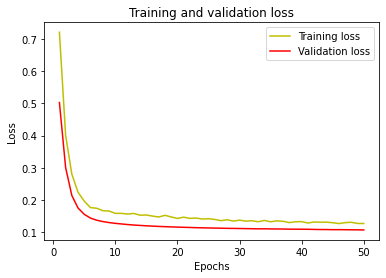

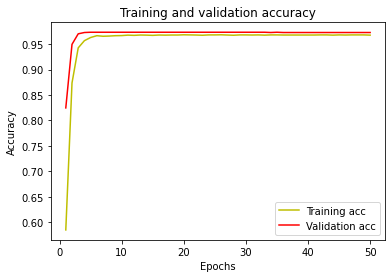

In [30]:
import matplotlib.pyplot as plt

history = model.fit(X_train, Y_train ,verbose=1, epochs=50, batch_size=64,
                    validation_data=(X_test, Y_test))

_, acc = model.evaluate(X_test, Y_test)
print("Accuracy = ", (acc * 100.0), "%")


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()